In [4]:
import pandas as pd
import chardet

In [5]:
# Detectar la codificación del archivo
with open('telefonos.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f'Codificación detectada: {encoding}')

# Leer el archivo CSV con la codificación detectada
df = pd.read_csv('telefonos.csv', encoding=encoding, delimiter=';')


Codificación detectada: ISO-8859-1


In [6]:
# Mostrar las primeras filas del DataFrame
df.head(20)

,Fecha,Representante,CódigoProducto,Unidades
0,1/1/2014,Valentina Tapia Castro,B00F3J4B5S,4.0
1,2/1/2014,Gabriela Rojas Huerta,B018IZ0SWI,2.0
2,2/1/2014,Carla Fernández Mendoza,B01DZJFWNC,1.0
3,2/1/2014,Luisa García López,B01DZJFWNC,2.0
4,2/1/2014,Juan Carlos Rodríguez Huamán,B016381QZA,4.0
5,3/1/2014,Ricardo Gómez Vargas,B00J0O5J4Y,2.0
6,3/1/2014,Diego Morales Castro,B01KBH547A,3.0
7,4/1/2014,Silvia Ramírez Rivera,B00K15Q2B0,15.0
8,4/1/2014,Laura Flores Guzmán,B00NQGP42Y,2.0
9,4/1/2014,Eduardo Cáceres Salazar,B00NQGP42Y,2.0


In [7]:
df = df.rename(columns={
    'CódigoProducto': 'Id Producto',
    'Unidades': 'Unidades Vendidas'
})

In [8]:
isna = df[df['Unidades Vendidas'].isna()]
cellphones = df[df['Unidades Vendidas'].notna()]
cellphones

,Fecha,Representante,Id Producto,Unidades Vendidas
0,1/1/2014,Valentina Tapia Castro,B00F3J4B5S,4.0
1,2/1/2014,Gabriela Rojas Huerta,B018IZ0SWI,2.0
2,2/1/2014,Carla Fernández Mendoza,B01DZJFWNC,1.0
3,2/1/2014,Luisa García López,B01DZJFWNC,2.0
4,2/1/2014,Juan Carlos Rodríguez Huamán,B016381QZA,4.0
...,...,...,...,...
9995,31/12/2015,Luisa Fernández Vargas,B01DZJFWNC,2.0
9996,31/12/2015,José Morales Huamán,B00F3J4B5S,3.0
9997,31/12/2015,Ana Paula Rojas Torres,B00K15Q2B0,1.0
9998,31/12/2015,Miguel Ángel Vega López,B018IZ0SWI,2.0


In [9]:
import pandas as pd
df_months = cellphones[['Fecha','Id Producto','Unidades Vendidas']]

In [10]:
df_months['Meses'] = pd.DatetimeIndex(df_months['Fecha']).month
df_months['Año'] = pd.DatetimeIndex(df_months['Fecha']).year
df_months

,Fecha,Id Producto,Unidades Vendidas,Meses,Año
0,1/1/2014,B00F3J4B5S,4.0,1,2014
1,2/1/2014,B018IZ0SWI,2.0,2,2014
2,2/1/2014,B01DZJFWNC,1.0,2,2014
3,2/1/2014,B01DZJFWNC,2.0,2,2014
4,2/1/2014,B016381QZA,4.0,2,2014
...,...,...,...,...,...
9995,31/12/2015,B01DZJFWNC,2.0,12,2015
9996,31/12/2015,B00F3J4B5S,3.0,12,2015
9997,31/12/2015,B00K15Q2B0,1.0,12,2015
9998,31/12/2015,B018IZ0SWI,2.0,12,2015


In [18]:
df_plot = df_months[['Año', 'Meses','Unidades Vendidas']].groupby(['Año', 'Meses']).sum()
df_plot = df_plot.reset_index()
df_plot.head(12)

,Año,Meses,Unidades Vendidas
0,2014,1,859.0
1,2014,2,799.0
2,2014,3,710.0
3,2014,4,922.0
4,2014,5,911.0
5,2014,6,838.0
6,2014,7,889.0
7,2014,8,838.0
8,2014,9,907.0
9,2014,10,842.0


In [19]:
df_plot.tail(12)

,Año,Meses,Unidades Vendidas
12,2015,1,790.0
13,2015,2,937.0
14,2015,3,825.0
15,2015,4,870.0
16,2015,5,806.0
17,2015,6,748.0
18,2015,7,943.0
19,2015,8,806.0
20,2015,9,829.0
21,2015,10,857.0


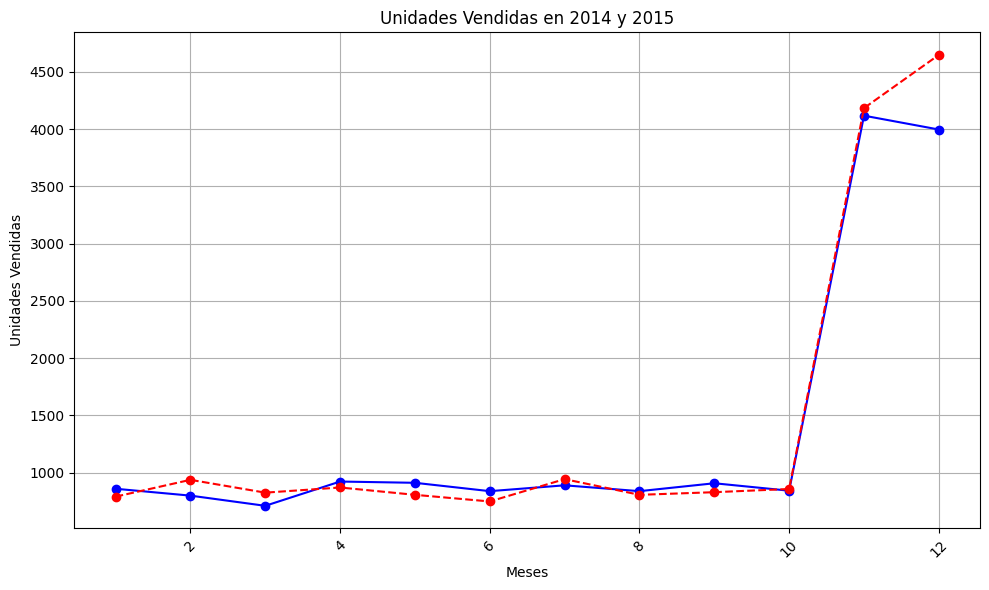

In [21]:
import matplotlib.pyplot as plt

items_sold_2014 = df_plot[['Año', 'Meses','Unidades Vendidas']].head(12)
items_sold_2015 = df_plot[['Año', 'Meses','Unidades Vendidas']].tail(12)

plt.figure(figsize=(10, 6))  # Definir el tamaño del gráfico (opcional)
plt.plot(items_sold_2014['Meses'], items_sold_2014['Unidades Vendidas'], marker='o', linestyle='-', color='b')  # Crear el gráfico de líneas para 2014
plt.plot(items_sold_2015['Meses'], items_sold_2015['Unidades Vendidas'], marker='o', linestyle='--', color='r')  # Crear el gráfico de líneas para 2015
plt.title('Unidades Vendidas en 2014 y 2015')  # Añadir título al gráfico
plt.xlabel('Meses')  # Etiqueta del eje x
plt.ylabel('Unidades Vendidas')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x (opcional para mejor visualización)
plt.grid(True)  # Mostrar cuadrícula (opcional)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()